In [1]:
import pandas as pd
import haversine as hs

In [2]:
aq_df = pd.read_csv('aq coordinates and locations.csv')

In [3]:
wx_df = pd.read_csv('wx coordinates and locations.csv')

In [4]:
distance_list = []
temp_list =[]

for ind1 in aq_df.index:
    latitude1 = aq_df['latitude'][ind1]
    longitude1 = aq_df['longitude'][ind1]
    coordinate1 = (latitude1, longitude1)
    temp_list=[]
    for ind2 in wx_df.index:
        latitude2 = wx_df['latitude'][ind2]
        longitude2 = wx_df['longitude'][ind2]
        coordinate2 = (latitude2, longitude2)
        distance = hs.haversine(coordinate1, coordinate2)
        temp_list.append((coordinate1, coordinate2, distance))
    distance_list.append(min(temp_list, key=lambda tup: tup[2]))
    

In [5]:
distance_list

[((47.51999, -120.47335), (47.3977, -120.2013), 24.56079190491299),
 ((47.19745, -120.95831), (47.2767, -121.3372), 29.93188673447914),
 ((47.197544, -120.95823), (47.2767, -121.3372), 29.93455966565244),
 ((47.19761, -120.95825), (47.2767, -121.3372), 29.93094229686385),
 ((47.19764, -120.95827), (47.2767, -121.3372), 29.928511238913455),
 ((47.558483, -120.672775), (47.3977, -120.2013), 39.68787556876578),
 ((47.558495, -120.67275), (47.3977, -120.2013), 39.68679568368629),
 ((47.558506, -120.67274), (47.3977, -120.2013), 39.686672498000206),
 ((47.558517, -120.67275), (47.3977, -120.2013), 39.68789120696429),
 ((47.55853, -120.67274), (47.3977, -120.2013), 39.68786770654309),
 ((47.558537, -120.672714), (47.3977, -120.2013), 39.68647199459629),
 ((47.558548, -120.67274), (47.3977, -120.2013), 39.68876420708795),
 ((47.558548, -120.67269), (47.3977, -120.2013), 39.68540976863406),
 ((47.558548, -120.67267), (47.3977, -120.2013), 39.684068013485174),
 ((47.55856, -120.672775), (47.397

In [23]:
entries_to_convert_to_df = []

for entry in distance_list:
    aq_lat = entry[0][0]
    aq_lon = entry[0][1]
    wx_lat = entry[1][0]
    wx_lon = entry[1][1]
    distance = entry[2]
    aq_city = aq_df[(aq_df['latitude']==aq_lat) & (aq_df['longitude'] == aq_lon)]['city']
    aq_city = aq_city.iloc[0]
    aq_location = aq_df[(aq_df['latitude']==aq_lat) & (aq_df['longitude'] == aq_lon)]['location'].iloc[0]
    wx_station = wx_df[(wx_df['latitude'] == wx_lat) & (wx_df['longitude'] == wx_lon)]['station']
    wx_station = wx_station.iloc[0]
    wx_name = wx_df[(wx_df['latitude'] == wx_lat) & (wx_df['longitude'] == wx_lon)]['name'].iloc[0]
    entries_to_convert_to_df.append([aq_city, aq_location, aq_lat, aq_lon, wx_station, wx_name, wx_lat, wx_lon, distance])


In [24]:
entries_to_convert_to_df

[['007',
  'Cashmere Mobile',
  47.51999,
  -120.47335,
  '72782594239',
  'WENATCHEE PANGBORN MEMORIAL AIRPORT, WA US',
  47.3977,
  -120.2013,
  24.56079190491299],
 ['007',
  'Cle Elum_Mobile',
  47.19745,
  -120.95831,
  '72781524237',
  'STAMPEDE PASS, WA US',
  47.2767,
  -121.3372,
  29.93188673447914],
 ['007',
  'Cle Elum_Mobile',
  47.197544,
  -120.95823,
  '72781524237',
  'STAMPEDE PASS, WA US',
  47.2767,
  -121.3372,
  29.93455966565244],
 ['007',
  'Cle Elum_Mobile',
  47.19761,
  -120.95825,
  '72781524237',
  'STAMPEDE PASS, WA US',
  47.2767,
  -121.3372,
  29.93094229686385],
 ['007',
  'Cle Elum_Mobile',
  47.19764,
  -120.95827,
  '72781524237',
  'STAMPEDE PASS, WA US',
  47.2767,
  -121.3372,
  29.928511238913455],
 ['007',
  'Leavenworth_Mobile',
  47.558483,
  -120.672775,
  '72782594239',
  'WENATCHEE PANGBORN MEMORIAL AIRPORT, WA US',
  47.3977,
  -120.2013,
  39.68787556876578],
 ['007',
  'Leavenworth_Mobile',
  47.558495,
  -120.67275,
  '72782594239',
  

In [25]:
new_frame = pd.DataFrame(entries_to_convert_to_df, columns = ['aq_city', 'aq_location', 'aq_lat', 'aq_lon', 'wx_station', 'wx_name', 'wx_lat', 'wx_lon', 'distance']) 

In [26]:
new_frame.head()

,aq_city,aq_location,aq_lat,aq_lon,wx_station,wx_name,wx_lat,wx_lon,distance
0,007,Cashmere Mobile,47.519990,-120.47335,72782594239,"WENATCHEE PANGBORN MEMORIAL AIRPORT, WA US",47.3977,-120.2013,24.560792
1,007,Cle Elum_Mobile,47.197450,-120.95831,72781524237,"STAMPEDE PASS, WA US",47.2767,-121.3372,29.931887
2,007,Cle Elum_Mobile,47.197544,-120.95823,72781524237,"STAMPEDE PASS, WA US",47.2767,-121.3372,29.934560
3,007,Cle Elum_Mobile,47.197610,-120.95825,72781524237,"STAMPEDE PASS, WA US",47.2767,-121.3372,29.930942
4,007,Cle Elum_Mobile,47.197640,-120.95827,72781524237,"STAMPEDE PASS, WA US",47.2767,-121.3372,29.928511


In [27]:
new_frame.to_csv("aq-wx_lookuptable.csv")

Text(0.5, 0.98, 'Histogram of Distances Between Weather and Air Quality Stations in Kilometers')

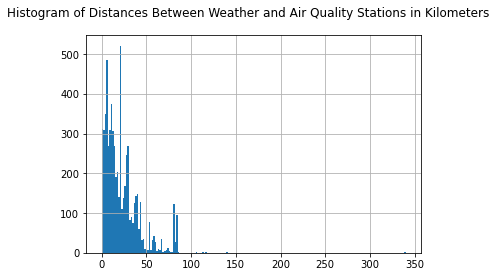

In [37]:
import pylab as pl
new_frame['distance'].hist(bins = 200)
pl.suptitle('Histogram of Distances Between Weather and Air Quality Stations in Kilometers')

In [35]:
new_frame['distance'].describe()

count    6436.000000
mean       22.099115
std        19.546868
min         0.000000
25%         7.730053
50%        17.352551
75%        29.928896
max       340.188868
Name: distance, dtype: float64